<a href="https://colab.research.google.com/github/muhamadrefo/EmisiCO2/blob/main/VisCO2Em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Dataset/CO2 Emmision
%ls

/content/drive/My Drive/Dataset/CO2 Emmision
'CO2 Emmision Indonesia.csv'


In [17]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split as tt
%matplotlib inline

# Step 1: Prepare the data

In [9]:
data = pd.read_csv('Indonesia.csv')
data

,Country Name,Country Code,Year,CO2 emissions from solid fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from solid fuel consumption (kt),CO2 emissions from liquid fuel consumption (kt),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions (kt),CO2 intensity (kg per kg of oil equivalent energy use),CO2 emissions (kg per 2010 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP)
0,Indonesia,IDN,1960,8.514648,68.768203,21.826281,1822.499,14719.338,4671.758,21404.279,NaN,0.353319,NaN,NaN
1,Indonesia,IDN,1961,5.875722,74.313090,18.951670,1529.139,19339.758,4932.115,26024.699,NaN,0.406266,NaN,NaN
2,Indonesia,IDN,1962,5.660979,70.642641,22.596077,1301.785,16244.810,5196.139,22995.757,NaN,0.352489,NaN,NaN
3,Indonesia,IDN,1963,7.001449,68.678577,23.595686,1595.145,15647.089,5375.822,22783.071,NaN,0.357220,NaN,NaN
4,Indonesia,IDN,1964,5.387261,70.198133,23.432127,1206.443,15720.429,5247.477,22394.369,NaN,0.339154,NaN,NaN
5,Indonesia,IDN,1965,3.089262,71.617407,24.550720,762.736,17682.274,6061.551,24689.911,NaN,0.369918,NaN,NaN
6,Indonesia,IDN,1966,3.840125,69.467085,25.971787,898.415,16252.144,6076.219,23395.460,NaN,0.341005,NaN,NaN
7,Indonesia,IDN,1967,2.523141,71.812481,24.947746,619.723,17638.270,6127.557,24561.566,NaN,0.353128,NaN,NaN
8,Indonesia,IDN,1968,1.714741,74.651070,22.889805,473.043,20593.872,6314.574,27586.841,NaN,0.357591,NaN,NaN
9,Indonesia,IDN,1969,1.680211,82.528004,14.979135,561.051,27557.505,5001.788,33391.702,NaN,0.405192,NaN,NaN


In [10]:
#replace missing data
data = data.replace(np.nan, '0', regex=True)
data

,Country Name,Country Code,Year,CO2 emissions from solid fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from solid fuel consumption (kt),CO2 emissions from liquid fuel consumption (kt),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions (kt),CO2 intensity (kg per kg of oil equivalent energy use),CO2 emissions (kg per 2010 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP)
0,Indonesia,IDN,1960,8.514648,68.768203,21.826281,1822.499,14719.338,4671.758,21404.279,0,0.353319,0,0
1,Indonesia,IDN,1961,5.875722,74.313090,18.951670,1529.139,19339.758,4932.115,26024.699,0,0.406266,0,0
2,Indonesia,IDN,1962,5.660979,70.642641,22.596077,1301.785,16244.810,5196.139,22995.757,0,0.352489,0,0
3,Indonesia,IDN,1963,7.001449,68.678577,23.595686,1595.145,15647.089,5375.822,22783.071,0,0.357220,0,0
4,Indonesia,IDN,1964,5.387261,70.198133,23.432127,1206.443,15720.429,5247.477,22394.369,0,0.339154,0,0
5,Indonesia,IDN,1965,3.089262,71.617407,24.550720,762.736,17682.274,6061.551,24689.911,0,0.369918,0,0
6,Indonesia,IDN,1966,3.840125,69.467085,25.971787,898.415,16252.144,6076.219,23395.460,0,0.341005,0,0
7,Indonesia,IDN,1967,2.523141,71.812481,24.947746,619.723,17638.270,6127.557,24561.566,0,0.353128,0,0
8,Indonesia,IDN,1968,1.714741,74.651070,22.889805,473.043,20593.872,6314.574,27586.841,0,0.357591,0,0
9,Indonesia,IDN,1969,1.680211,82.528004,14.979135,561.051,27557.505,5001.788,33391.702,0,0.405192,0,0


In [11]:
#rename columns
data = data.rename(columns={'CO2 emissions from solid fuel consumption (% of total)':'solid % consumption',
                            'CO2 emissions from liquid fuel consumption (% of total)':'liquid % consumption',
                            'CO2 emissions from gaseous fuel consumption (% of total)':'gaseous % consumption',
                            'CO2 emissions from solid fuel consumption (kt)':'solid kt consumption',
                            'CO2 emissions from liquid fuel consumption (kt)':'liquid kt consumption',
                            'CO2 emissions from gaseous fuel consumption (kt)':'gaseous kt consumption'
                            })
data

,Country Name,Country Code,Year,solid % consumption,liquid % consumption,gaseous % consumption,solid kt consumption,liquid kt consumption,gaseous kt consumption,CO2 emissions (kt),CO2 intensity (kg per kg of oil equivalent energy use),CO2 emissions (kg per 2010 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP)
0,Indonesia,IDN,1960,8.514648,68.768203,21.826281,1822.499,14719.338,4671.758,21404.279,0,0.353319,0,0
1,Indonesia,IDN,1961,5.875722,74.313090,18.951670,1529.139,19339.758,4932.115,26024.699,0,0.406266,0,0
2,Indonesia,IDN,1962,5.660979,70.642641,22.596077,1301.785,16244.810,5196.139,22995.757,0,0.352489,0,0
3,Indonesia,IDN,1963,7.001449,68.678577,23.595686,1595.145,15647.089,5375.822,22783.071,0,0.357220,0,0
4,Indonesia,IDN,1964,5.387261,70.198133,23.432127,1206.443,15720.429,5247.477,22394.369,0,0.339154,0,0
5,Indonesia,IDN,1965,3.089262,71.617407,24.550720,762.736,17682.274,6061.551,24689.911,0,0.369918,0,0
6,Indonesia,IDN,1966,3.840125,69.467085,25.971787,898.415,16252.144,6076.219,23395.460,0,0.341005,0,0
7,Indonesia,IDN,1967,2.523141,71.812481,24.947746,619.723,17638.270,6127.557,24561.566,0,0.353128,0,0
8,Indonesia,IDN,1968,1.714741,74.651070,22.889805,473.043,20593.872,6314.574,27586.841,0,0.357591,0,0
9,Indonesia,IDN,1969,1.680211,82.528004,14.979135,561.051,27557.505,5001.788,33391.702,0,0.405192,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country Name                                            57 non-null     object 
 1   Country Code                                            57 non-null     object 
 2   Year                                                    57 non-null     int64  
 3   solid % consumption                                     57 non-null     float64
 4   liquid % consumption                                    57 non-null     float64
 5   gaseous % consumption                                   57 non-null     float64
 6   solid kt consumption                                    57 non-null     float64
 7   liquid kt consumption                                   57 non-null     float64
 8   gaseous kt consumption                    

In [15]:
#change type data
data['CO2 intensity (kg per kg of oil equivalent energy use)']= data['CO2 intensity (kg per kg of oil equivalent energy use)'].astype('float64')
data['CO2 emissions (kg per 2017 PPP $ of GDP)']= data['CO2 emissions (kg per 2017 PPP $ of GDP)'].astype('float64')
data['CO2 emissions (kg per PPP $ of GDP)']= data['CO2 emissions (kg per PPP $ of GDP)'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country Name                                            57 non-null     object 
 1   Country Code                                            57 non-null     object 
 2   Year                                                    57 non-null     int64  
 3   solid % consumption                                     57 non-null     float64
 4   liquid % consumption                                    57 non-null     float64
 5   gaseous % consumption                                   57 non-null     float64
 6   solid kt consumption                                    57 non-null     float64
 7   liquid kt consumption                                   57 non-null     float64
 8   gaseous kt consumption                    

In [16]:
#check if there's still null inside data
data.isnull().sum()

Country Name                                              0
Country Code                                              0
Year                                                      0
solid % consumption                                       0
liquid % consumption                                      0
gaseous % consumption                                     0
solid kt consumption                                      0
liquid kt consumption                                     0
gaseous kt consumption                                    0
CO2 emissions (kt)                                        0
CO2 intensity (kg per kg of oil equivalent energy use)    0
CO2 emissions (kg per 2010 US$ of GDP)                    0
CO2 emissions (kg per 2017 PPP $ of GDP)                  0
CO2 emissions (kg per PPP $ of GDP)                       0
dtype: int64

#Step 2: Visualization the Data

Text(0.5, 1.0, 'Total Solid Fuel Consumption KiloTone')

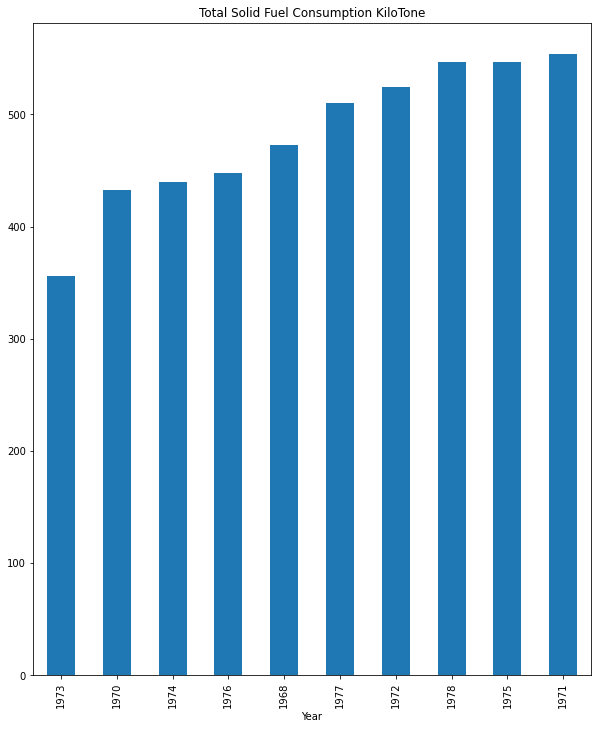

In [50]:
dataYear = data[(data['Year']<=2016) & (data['Year']>=1960)]
solidtop = dataYear.groupby('Year')['solid kt consumption'].sum()
solidtop.sort_values()[:10].plot(kind='bar', figsize=(10,12))
plt.title('Total Solid Fuel Consumption KiloTone')

In [51]:
solidtop.sort_values()[:10]

Year
1973    355.699
1970    432.706
1974    440.040
1976    447.374
1968    473.043
1977    509.713
1972    524.381
1978    546.383
1975    546.383
1971    553.717
Name: solid kt consumption, dtype: float64

Text(0.5, 1.0, 'Total Liquid Fuel Consumption KiloTone')

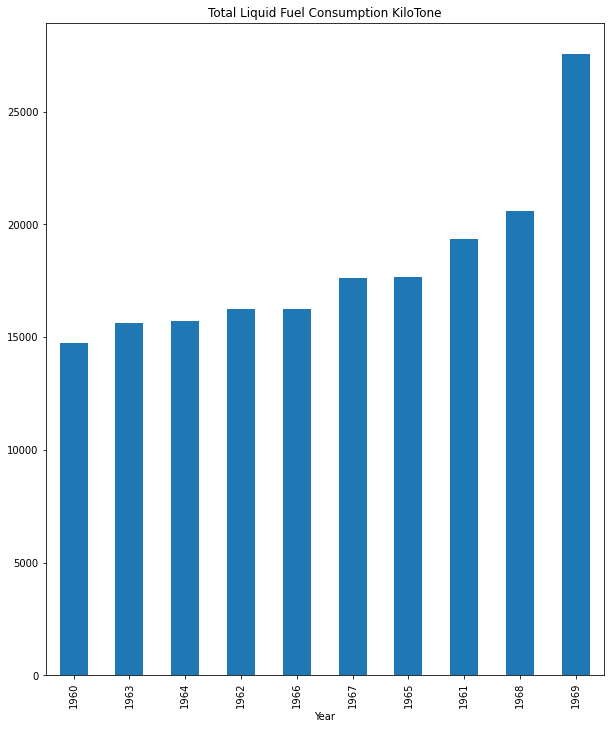

In [52]:
dataYear = data[(data['Year']<=2016) & (data['Year']>=1960)]
liquidtop = dataYear.groupby('Year')['liquid kt consumption'].sum()
liquidtop.sort_values()[:10].plot(kind='bar', figsize=(10,12))
plt.title('Total Liquid Fuel Consumption KiloTone')

In [53]:
liquidtop.sort_values()[:10]

Year
1960    14719.338
1963    15647.089
1964    15720.429
1962    16244.810
1966    16252.144
1967    17638.270
1965    17682.274
1961    19339.758
1968    20593.872
1969    27557.505
Name: liquid kt consumption, dtype: float64

Text(0.5, 1.0, 'Total Gaseous Fuel Consumption KiloTone')

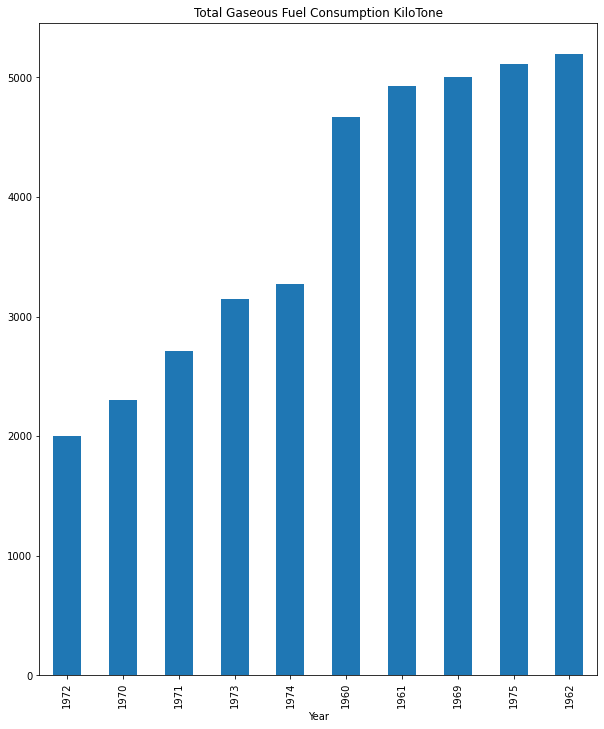

In [54]:
dataYear = data[(data['Year']<=2016) & (data['Year']>=1960)]
gaseoustop = dataYear.groupby('Year')['gaseous kt consumption'].sum()
gaseoustop.sort_values()[:10].plot(kind='bar', figsize=(10,12))
plt.title('Total Gaseous Fuel Consumption KiloTone')

In [55]:
gaseoustop.sort_values()[:10]

Year
1972    1998.515
1970    2302.876
1971    2713.580
1973    3146.286
1974    3274.631
1960    4671.758
1961    4932.115
1969    5001.788
1975    5111.798
1962    5196.139
Name: gaseous kt consumption, dtype: float64

Text(0.5, 1.0, 'Total CO2 Emissions per KiloTone')

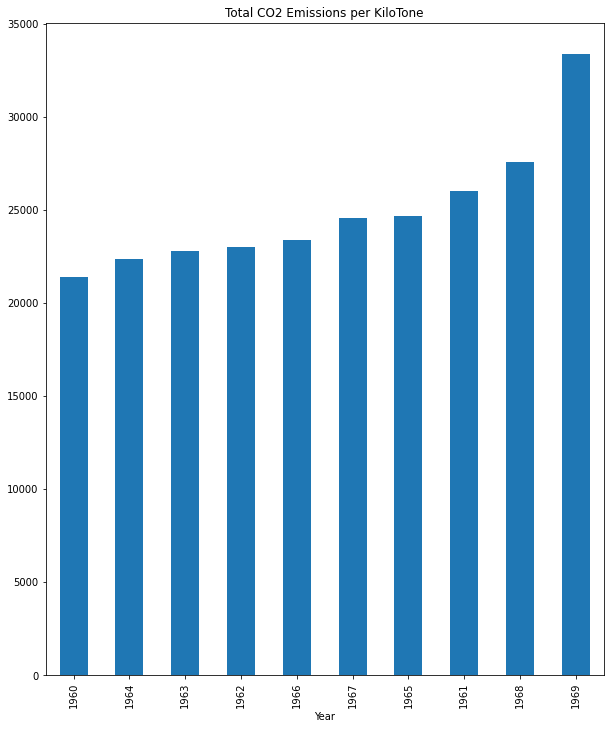

In [56]:
dataYear = data[(data['Year']<=2016) & (data['Year']>=1960)]
co2emtop = dataYear.groupby('Year')['CO2 emissions (kt)'].sum()
co2emtop.sort_values()[:10].plot(kind='bar', figsize=(10,12))
plt.title('Total CO2 Emissions per KiloTone')

In [57]:
co2emtop.sort_values()[:10]

Year
1960    21404.279
1964    22394.369
1963    22783.071
1962    22995.757
1966    23395.460
1967    24561.566
1965    24689.911
1961    26024.699
1968    27586.841
1969    33391.702
Name: CO2 emissions (kt), dtype: float64

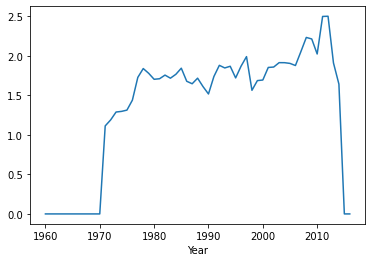

In [58]:
data.plot(x='Year', y='CO2 intensity (kg per kg of oil equivalent energy use)', legend=False)
plt.show()

Text(0.5, 1.0, 'Total CO2 Emissions per KiloTone')

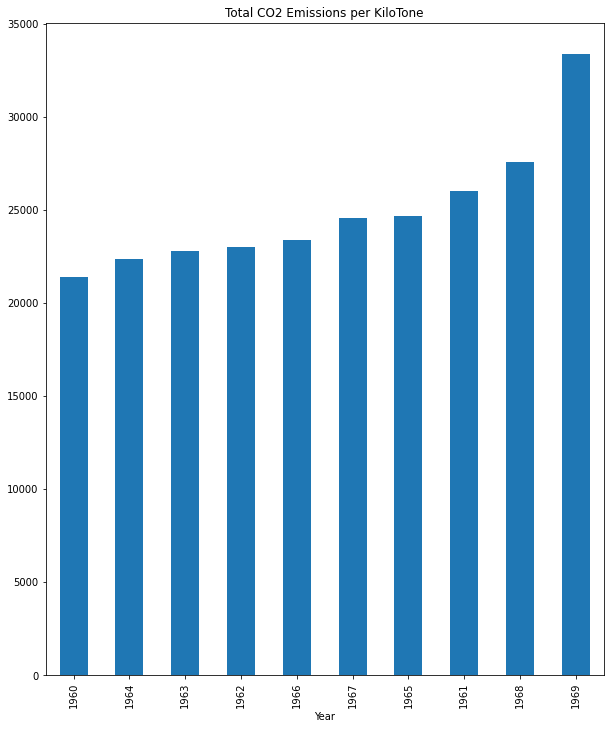

In [59]:
co2em = data[(data['Year']<=2016) & (data['Year']>=1960)]
co2emtop = liquidcons.groupby('Year')['CO2 emissions (kt)'].sum()
co2emtop.sort_values()[:10].plot(kind='bar', figsize=(10,12))
plt.title('Total CO2 Emissions per KiloTone')

#Step 3: Prediction